In [38]:
x1 = [3,4]
x2 = [2,2]
y = [17,20]


n = 1 # Number of observations or  rows in the dataset
alpha = 0.1

The primary objective is to predict the output value y based on two input features x1 and x2 using a basic neural network model with the equation y=3x1+4x2. The neural network will be trained using a feed-forward and back-propagation mechanism to minimize the error between the predicted and actual values.

**1. Activation Functions:**



*   Define the sigmoid function, a popular activation function used in neural
networks.

Answer: It is commonly used for models where we have to predict the probability
as an output (classification problem). Since probability of anything exists only between the range of 0 and 1, sigmoid is best suited because of its range.

The function is differentiable and provides a smooth gradient, i.e., preventing jumps in output values. This is represented by the S-shape of the sigmoid activation function.

However, the function ceases to learn and suffers from the Vanishing gradient problem.

Use case : However, its useful in Hidden layers for shallow networks and best used for Binary classification problem there we apply it at the Output layer.





*   Define the tanh function, which is another common activation function that
returns values between -1 and 1.

Answer : The tanh activation function, also called the hyperbolic tangent activation function, is a mathematical function commonly used in artificial neural networks for their hidden layers.

It transforms input values to produce output values between -1 and 1. It is expressed as the ratio of the difference between the exponential of the input value and the exponential of its negation to the sum of these exponentials.

Historically, the tanh function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks. However it does not solve the vanishing gradient problem that sigmoids suffered

Its also useful in Hidden layers for shallow networks.



*   Define the relu function, which returns positive values as they are and zeroes out negative values.

ReLU - The rectified linear unit is an activation function that introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue.

Most preferred for hidden layer in the neural network.





In [39]:
import numpy as np

3. Feed Forward:


  ● Initialize the random weights w1 and w2 between 1 and 10.
  
  ● Predict the output ypred using the equation ypred= x1 x w1 + x2 x w2

In [40]:
#random initialization between 1 to 10

w1 = np.random.uniform(1, 10)
w2 = np.random.uniform(1, 10)

print(f"Initialized weights : w1: {w1} | w2: {w2} ")

Initialized weights : w1: 5.7020730308418806 | w2: 9.57571579129215 


### Forward Pass function

In [41]:
# Forward Pass function

def forward_pass(w1, w2, b):
    y_preds = []
    total_error = 0

    for i in range(n):
        y_hat = w1*x1[i] + w2*x2[i] + b
        y_preds.append(y_hat)

        E = (y_hat - y[i])**2
        total_error+=E # total_errorE = total_errorE + E

    return y_preds, total_error


### Weight Update Step

In [42]:
def weight_update(w1, w2, b, y_preds):

    for i in range(n):
        dj_dw1 = 2 * (y_preds[i]-y[i])* x1[i]
        dj_dw2 = 2 * (y_preds[i]-y[i])* x2[i]
        dj_db = 2 * (y_preds[i]-y[i])

        w1 = w1 - alpha * dj_dw1
        w2 = w2 - alpha * dj_dw2
        b = b - alpha * dj_db

    return w1, w2, b

4. Error Calculation:

   ● Compute the squared error as error = (yactual-ypred)*(yactual-ypred)

5. Back Propagation:


  ● Compute the gradients of the error with respect to the weights.

  ● Update the weights using the computed gradients and a learning rate

6. Training:


  ● The above steps (Feed Forward to Back Propagation) are performed
iteratively (20 times in this example) to refine the weights and minimize the error.

### Model Orchestration

In [43]:

# Model Orchestration
import numpy as np

# Params
alpha = 0.0005

## Weight Initialization

## Weight Initialization
w1 = np.random.uniform(1, 10)
w2 = np.random.uniform(1, 10)


b = np.random.randn(3)

print(f"Initialized weights : w1: {w1} | w2: {w2} | b: {b} ")

# n = len(x1)
iterations = 20
error = []
for iter_num in range(iterations):
    y_preds, total_error = forward_pass(w1, w2, b) # Forward pass - predictions and the error corresponding to current weights
    print(f"Iteration : {iter_num} | Error: {total_error}")
    error.append(total_error)
    w1, w2, b = weight_update(w1, w2, b, y_preds)


Initialized weights : w1: 9.115489635732414 | w2: 2.555949842153372 | b: [ 0.44657994 -0.13340045 -0.36069109] 
Iteration : 0 | Error: [252.96738777 234.85464855 227.93986595]
Iteration : 1 | Error: [245.93388252 228.3247499  221.60222591]
Iteration : 2 | Error: [239.09593685 221.97640855 215.44079762]
Iteration : 3 | Error: [232.44811342 215.80457649 209.45068169]
Iteration : 4 | Error: [225.98512607 209.80434604 203.62711493]
Iteration : 5 | Error: [219.70183563 203.97094601 197.96546663]
Iteration : 6 | Error: [213.59324579 198.29973782 192.46123479]
Iteration : 7 | Error: [207.65449919 192.78621191 187.11004262]
Iteration : 8 | Error: [201.88087349 187.42598408 181.907635  ]
Iteration : 9 | Error: [196.26777768 182.21479202 176.84987511]
Iteration : 10 | Error: [190.81074839 177.14849194 171.93274119]
Iteration : 11 | Error: [185.50544634 172.22305527 167.15232325]
Iteration : 12 | Error: [180.34765291 167.43456544 162.50482005]
Iteration : 13 | Error: [175.33326677 162.77921478 15

7. Visualization:


  ● Plot the progression of the error across epochs.
  
  ● Plot the progression of ypred across epochs

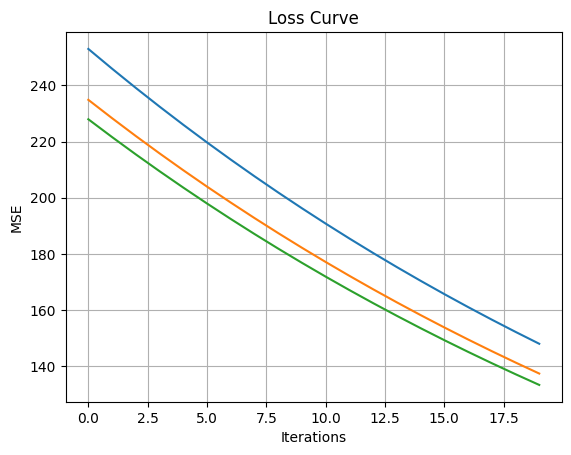

In [44]:
import matplotlib.pyplot as plt
plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Loss Curve")
plt.grid()
plt.show()

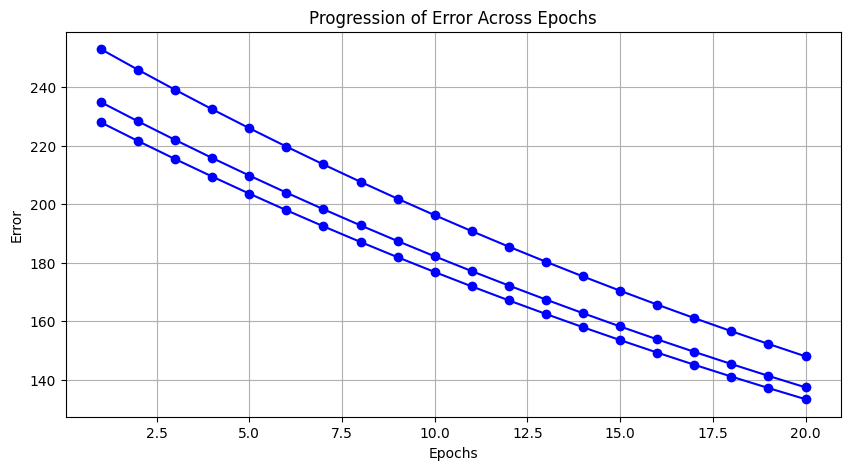

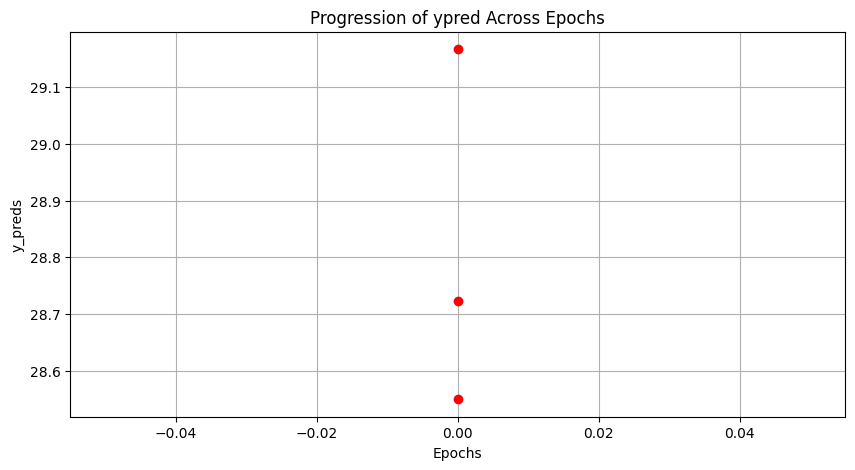

In [47]:
import matplotlib.pyplot as plt



# Plot the progression of the error across epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), error, marker='o', linestyle='-', color='b')
plt.title('Progression of Error Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Plot the progression of ypred across epochs
plt.figure(figsize=(10, 5))
plt.plot(y_preds, marker='o', linestyle='-', color='r')
plt.title('Progression of ypred Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('y_preds')
plt.grid(True)
plt.show()
